# ONTARIO Population COVID-19 Data set from: 
[data.ontario.ca](https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario)

### Import Required LIbraries

In [1]:
import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

%matplotlib inline

### Import the data set from a url

In [2]:
url = 'https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv'

df = pd.read_csv(url)

df.tail()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
105496,105497,2020-03-15,2020-03-24,2020-04-13,NaN,20s,FEMALE,CC,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
105497,105498,2020-04-17,2020-04-24,2020-04-24,2020-04-21,50s,FEMALE,No known epi link,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
105498,105499,2020-04-22,2020-05-04,2020-05-02,NaN,30s,FEMALE,OB,Resolved,Yes,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
105499,105500,2020-03-14,2020-03-27,2020-03-27,NaN,60s,FEMALE,CC,Resolved,NaN,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
105500,105501,2020-09-29,2020-10-06,2020-10-06,2020-09-29,20s,UNSPECIFIED,No known epi link,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [26]:
df['Test_Reported_Date'] = pd.to_datetime(df['Test_Reported_Date'])
print(min(df['Test_Reported_Date']))
print(max(df['Test_Reported_Date']))

2020-06-01 00:00:00
2020-11-23 00:00:00


## Filter the Test Reported Date to June 1, 2020 > Last Reported Date

In [5]:
start_date = '2020-06-01'
df = df[df['Test_Reported_Date'] >= start_date] 

In [6]:
df['Test_Reported_Date'] = pd.to_datetime(df['Test_Reported_Date'])
print(min(df['Test_Reported_Date']))

2020-06-01 00:00:00


In [7]:
df['Age_Group'].unique()

array(['20s', '40s', '<20', '30s', '60s', '50s', '80s', '90s', '70s', nan,
       'UNKNOWN'], dtype=object)

In [8]:
df_age20andbelow = df[df['Age_Group'] == '<20']

In [9]:
df2 = df_age20andbelow[["Test_Reported_Date", "Age_Group", "Reporting_PHU_City"]]

In [10]:
df2.head()

,Test_Reported_Date,Age_Group,Reporting_PHU_City
3,2020-11-08,<20,St. Thomas
4,2020-11-13,<20,Simcoe
14,2020-10-25,<20,St. Thomas
24,2020-10-28,<20,St. Thomas
26,2020-11-16,<20,St. Thomas


In [11]:
df2["Case"] = 1
df2 = df2.loc[:, ['Test_Reported_Date', 'Case']]
df2.head()

C:\Users\P\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Test_Reported_Date,Case
3,2020-11-08,1
4,2020-11-13,1
14,2020-10-25,1
24,2020-10-28,1
26,2020-11-16,1


In [12]:
df3 = df2.groupby(['Test_Reported_Date'])['Case'].agg('sum')
df3.tail(5)

Test_Reported_Date
2020-11-19    173
2020-11-20    291
2020-11-21    172
2020-11-22    115
2020-11-23      1
Name: Case, dtype: int64

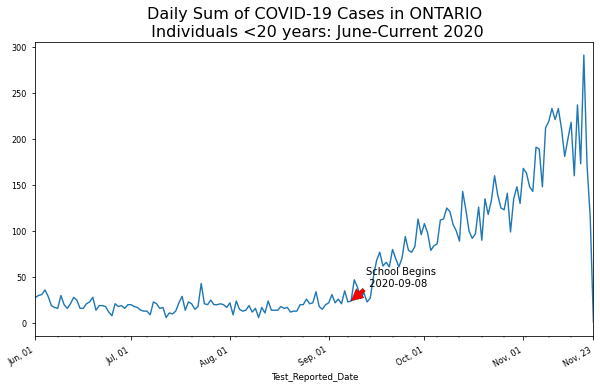

In [13]:
xpos = '2020-09-08'
ypos = df3.loc['2020-09-08']


plt.figure(figsize=(10,6))
plt.style.use(['default', 'seaborn-paper'])

df3.plot()
plt.title("Daily Sum of COVID-19 Cases in ONTARIO\n Individuals <20 years: June-Current 2020",
         fontsize=16)

plt.gcf().autofmt_xdate()

date_format = mpl_dates.DateFormatter('%b, %d')
# Get Current Axis
plt.gca().xaxis.set_major_formatter(date_format)

plt.annotate(f"School Begins \n {xpos}", xy = (xpos, ypos), xytext=(15, 15),
            textcoords='offset points',
            arrowprops = dict(facecolor='red'))

plt.show()

In [14]:
datetime_index = pd.DatetimeIndex(df2.Test_Reported_Date.values)
df4 = df2.set_index(datetime_index)
df4.drop('Test_Reported_Date', axis=1, inplace=True)
df4 = df4.sort_index()
df4.tail()

,Case
2020-11-22,1
2020-11-22,1
2020-11-22,1
2020-11-22,1
2020-11-23,1


In [15]:
weekly_sum = df4['Case'].resample("W").sum()
weekly_sum.tail()

2020-11-01     944
2020-11-08    1194
2020-11-15    1498
2020-11-22    1366
2020-11-29       1
Freq: W-SUN, Name: Case, dtype: int64

<AxesSubplot:>

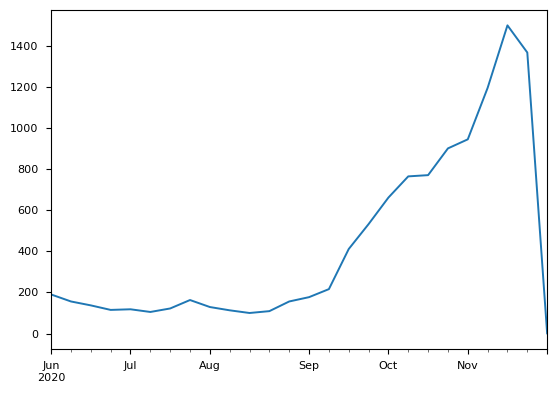

In [16]:
weekly_sum.plot()

In [17]:
df5 = df4.groupby(df4.index)['Case'].sum()

In [18]:
df5.head()

2020-06-01    28
2020-06-02    30
2020-06-03    31
2020-06-04    36
2020-06-05    29
Name: Case, dtype: int64

<AxesSubplot:>

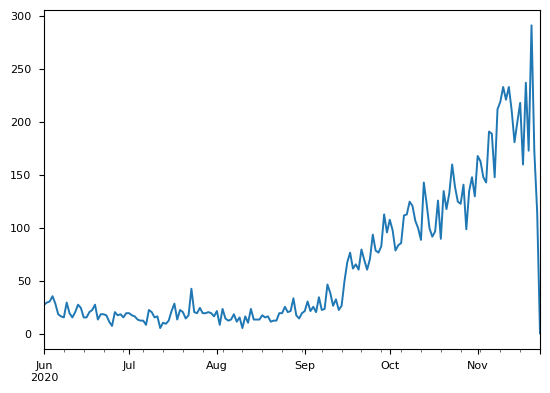

In [19]:
df5.plot()

In [28]:
df2.sort_values("Test_Reported_Date", inplace=True)
datetime_index = pd.DatetimeIndex(df2.Test_Reported_Date.values)
df2 = df2.set_index(datetime_index)
#df2.drop('Test_Reported_Date', inplace=True)
df2.head()

,Test_Reported_Date,Case
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1
2020-06-01,2020-06-01,1


In [30]:
#df2 = df2.drop(['Test_Reported_Date'], axis=1)
df2.head()

,Case
2020-06-01,1
2020-06-01,1
2020-06-01,1
2020-06-01,1
2020-06-01,1


<AxesSubplot:>

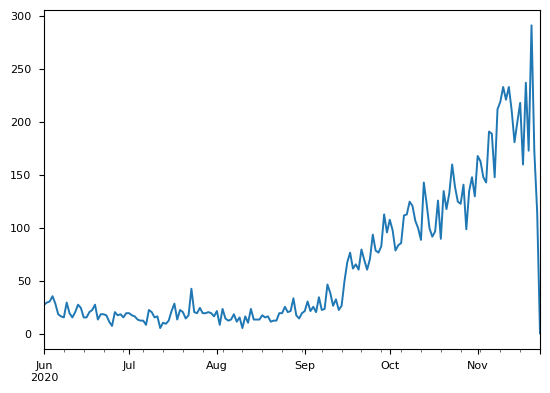

In [31]:
#df5 = pd.DataFrame(df5)
daily_sum= df2['Case'].resample("D").sum()
daily_sum.plot()

<AxesSubplot:>

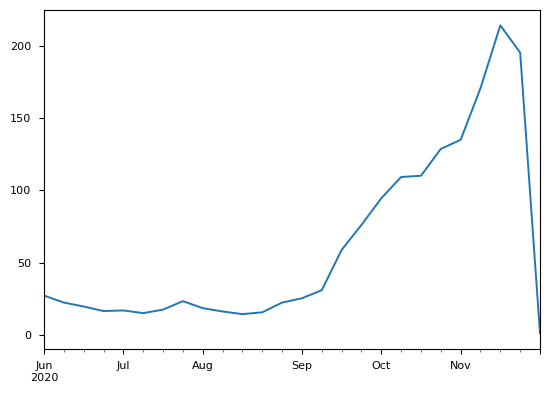

In [23]:
weekly_mean = daily_sum.resample("W").mean()
weekly_mean.plot()

In [24]:
daily_sum.tail()

2020-11-19    173
2020-11-20    291
2020-11-21    172
2020-11-22    115
2020-11-23      1
Freq: D, Name: Case, dtype: int64

In [25]:
weekly_mean.tail()

2020-11-01    134.857143
2020-11-08    170.571429
2020-11-15    214.000000
2020-11-22    195.142857
2020-11-29      1.000000
Freq: W-SUN, Name: Case, dtype: float64

In [33]:
weekly_sum.tail()

2020-11-01     944
2020-11-08    1194
2020-11-15    1498
2020-11-22    1366
2020-11-29       1
Freq: W-SUN, Name: Case, dtype: int64

## Save the three data frames (daily_sum, weekly_mean, weekly_sum) to CSV files

In [34]:
daily_sum.to_csv("less_than_20_daily_sum_COVID19.csv")

In [35]:
weekly_mean.to_csv("less_than_20_weekly_mean_COVID19.csv")

In [36]:
weekly_sum.to_csv("less_than_20_weekly_sum_COVID19.csv")